In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import pandas as pd
pd.options.mode.chained_assignment = None 

import scipy.stats as stats

In [20]:
#loading the data

data = pd.read_csv("Clean_data")

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [21]:
#subsetting the data
data = data[["LotFrontage","LotArea","GrLivArea","SalePrice"]]

In [22]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(data, # predictors
    data['SalePrice'],  
    test_size=0.3,  
    random_state=42)

In [23]:
#function for plotting

def diag_plots(df, variable):
    
    """
    function to plot a histogram and a Q-Q plot
    side by side, for a certain variable
    """
    
    
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=50)
    plt.title(variable)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(variable)

    plt.show()

In [24]:
#creating list of numerical variable
num_var = ["LotFrontage","LotArea","GrLivArea"]

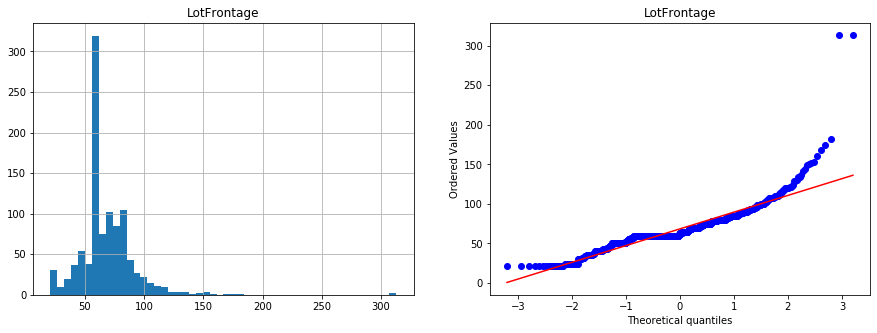

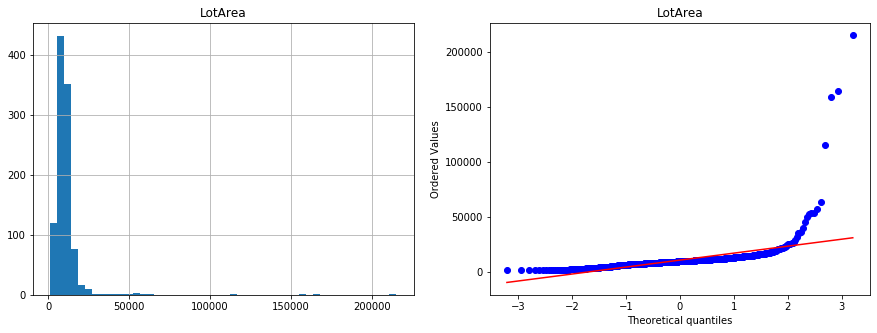

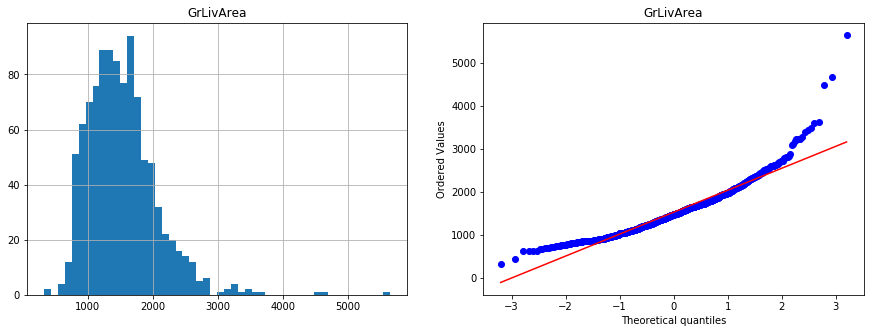

In [25]:
#applying the plotting fucntion 
for var in num_var:
    diag_plots(X_train,var)

In [26]:
#applying boxcox transformation
for var in num_var:
    X_train[var+"_boxcox"], param = stats.boxcox(X_train[var]) 


In [27]:
#list transformed variable
transformed = ["LotFrontage_boxcox","LotArea_boxcox","GrLivArea_boxcox"]

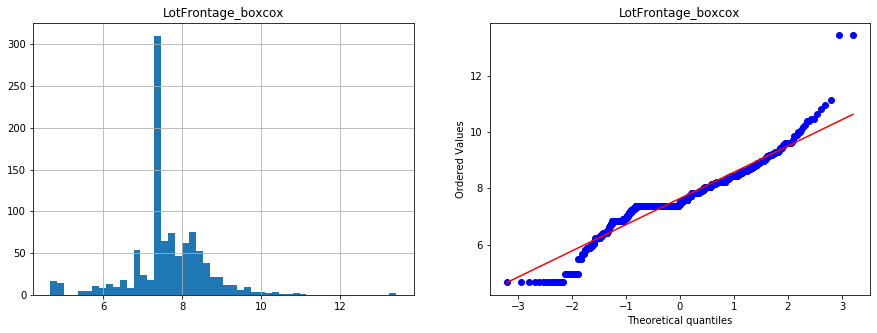

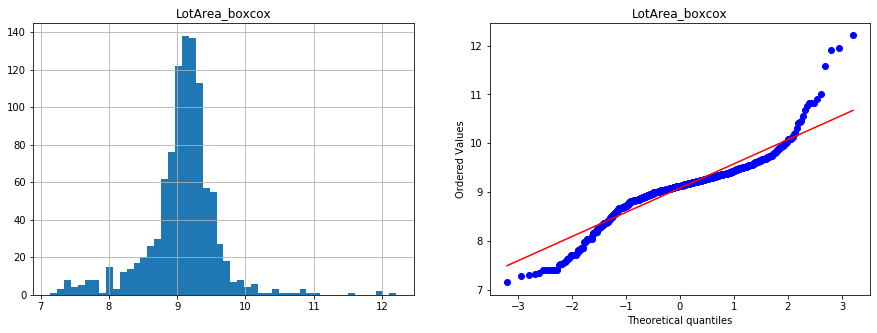

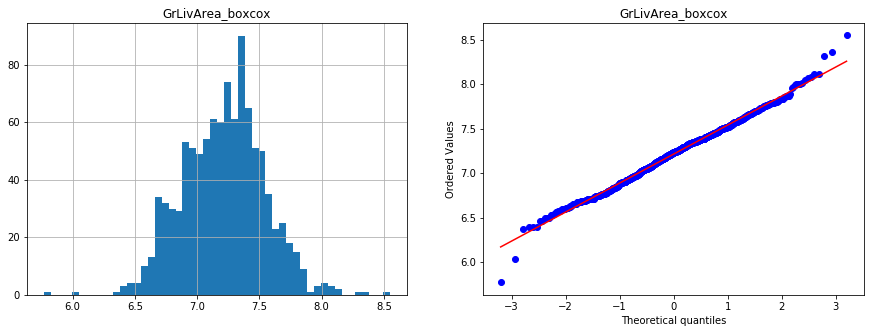

In [28]:
#ploting the transformed variable
for var in transformed:
    diag_plots(X_train,var)